# Allgemeine Relativitätstheorie mit dem Computer 
# General Theory of Relativity on the Computer

## Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main (Sommersemester 2021)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 29.05.2021


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Die Tolman-Oppenheimer-Volkoff (TOV) Gleichung
## Visualisierung der C++ Resultate

### Wiederholung: Von der Einstein Gleichung zur TOV Gleichung

In dem Jupyter Notebook <A href="https://itp.uni-frankfurt.de/~hanauske/VARTC/VARTCorona/python2021/TOV_2023.html" target="_blank">TOV_2023.ipny</A> ) hatten wir die TOV-Gleichungen analytisch aus der Einstein-Gleichung unter Zuhilfenahme der kovarianten Erhaltung des Energieimpulses hergeleitet 

$$ G^\mu{}\!_\nu = R^\mu{}\!_\nu - \frac{1}{2}g^\mu{}\!_\nu R =  8\pi \, T^\mu{}\!_\nu \quad, \quad
\nabla\!_\mu T^\mu{}\!_\nu = 0 \quad .
$$

Dabei setzen wir die Metrik und den Energie-Impuls-Tensor im Inneren des Objektes wie folgt an:

$$g_{\mu\nu}=\left( \begin{array}{ccc} e^{2\Phi(r)} & 0 & 0 & 0\\ 0&  - \left(  1 - \frac{2 m(r)}{r} \right)^{-1}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right) \quad  , \quad
T^\mu{}\!_\nu=\left( \begin{array}{ccc} e(r) & 0 & 0 & 0\\ 0& -p(r)&  0&0 \\ 0&  0&  -p(r)& 0\\ 0&  0&  0& -p(r)\\ \end{array} \right) \quad .
$$

Durch Umschreiben und Kombination der Gleichungen gelangt man zu einem System von drei gekoppelten Differentialgleichungen erster Ordnung, die sogenannten <i>Tolman-Oppenheimer-Volkoff (TOV) Gleichungen</i>:

$$
\begin{equation}
\frac{dm}{dr} ~=~ 4\pi r^2~e ~, \quad
\frac{dp}{dr} ~=~ -(e+p) \, \frac{m+4 \pi r^3 p}{r \left(r -2m \right)} ~, \quad
\frac{d\Phi}{dr} ~=~ \frac{m+4 \pi r^3 p}{r \left(r -2m \right)} \quad .
\end{equation}
$$

Aufgrund des Birkoff-Theorems muss die Innenraum-Lösung der Metrik in die äußere Schwarzschildmetrik am Sternrand stetig ineinander übergehen. Am Rand des betrachteten Objektes ($r=R$) gilt für die $g_{tt}$-Komponente der Metrik:

$$
g_{tt}(R)=e^{2\,\Phi(R)} = \left( 1 - \frac{2 \, M}{R} \right) = \left( 1 - \frac{2 \, m(R)}{R} \right) \quad ,
$$
wobei $M=m(R)$ die Gesamtmasse des Sterns ist.

Wir hatten zusätzlich die numerische Lösung dieses System von gekoppelten Differentialgleichungen erster Ordnung 
mittels eines polytropen Ansatzes der Zustandsgleichung der Form $p(e)=K\,e^{\gamma}$ berechnet und uns die Eigenschaften der Neutronensterne visualisiert.

In diesem Jupyter Notebook werden wir die numerisch mittels des C++ Programmes <A href="http://itp.uni-frankfurt.de/~hanauske/VARTC/" target="_blank">TOV1_VARTC_2023.cpp</A> berechneten Daten (siehe <A href="http://itp.uni-frankfurt.de/~hanauske/VARTC/" target="_blank">TOV1_VARTC_2023.dat</A>) visualisieren 

<ul>
    <li>Spezialfall: Gravitationsfeld einer Kugel aus inkompressibler Flüssigkeit (konstante Dichte)</li>
    <li>Visualisierung der raumzeitlichen Struktur eines kompakten Sterns mittels des eingebetteten Diagramms der räumlichen Hypersphäre der Mannigfaltigkeit</li>
    <li>Numerisches Lösen der TOV-Gleichungen mittels des Euler-Verfahrens</li>
</ul>

Wir vergleichen nun die Ergebnisse mit dem C++ Programm aus Vorlesung 7 (siehe https://itp.uni-frankfurt.de/~hanauske/new/index.html ) 

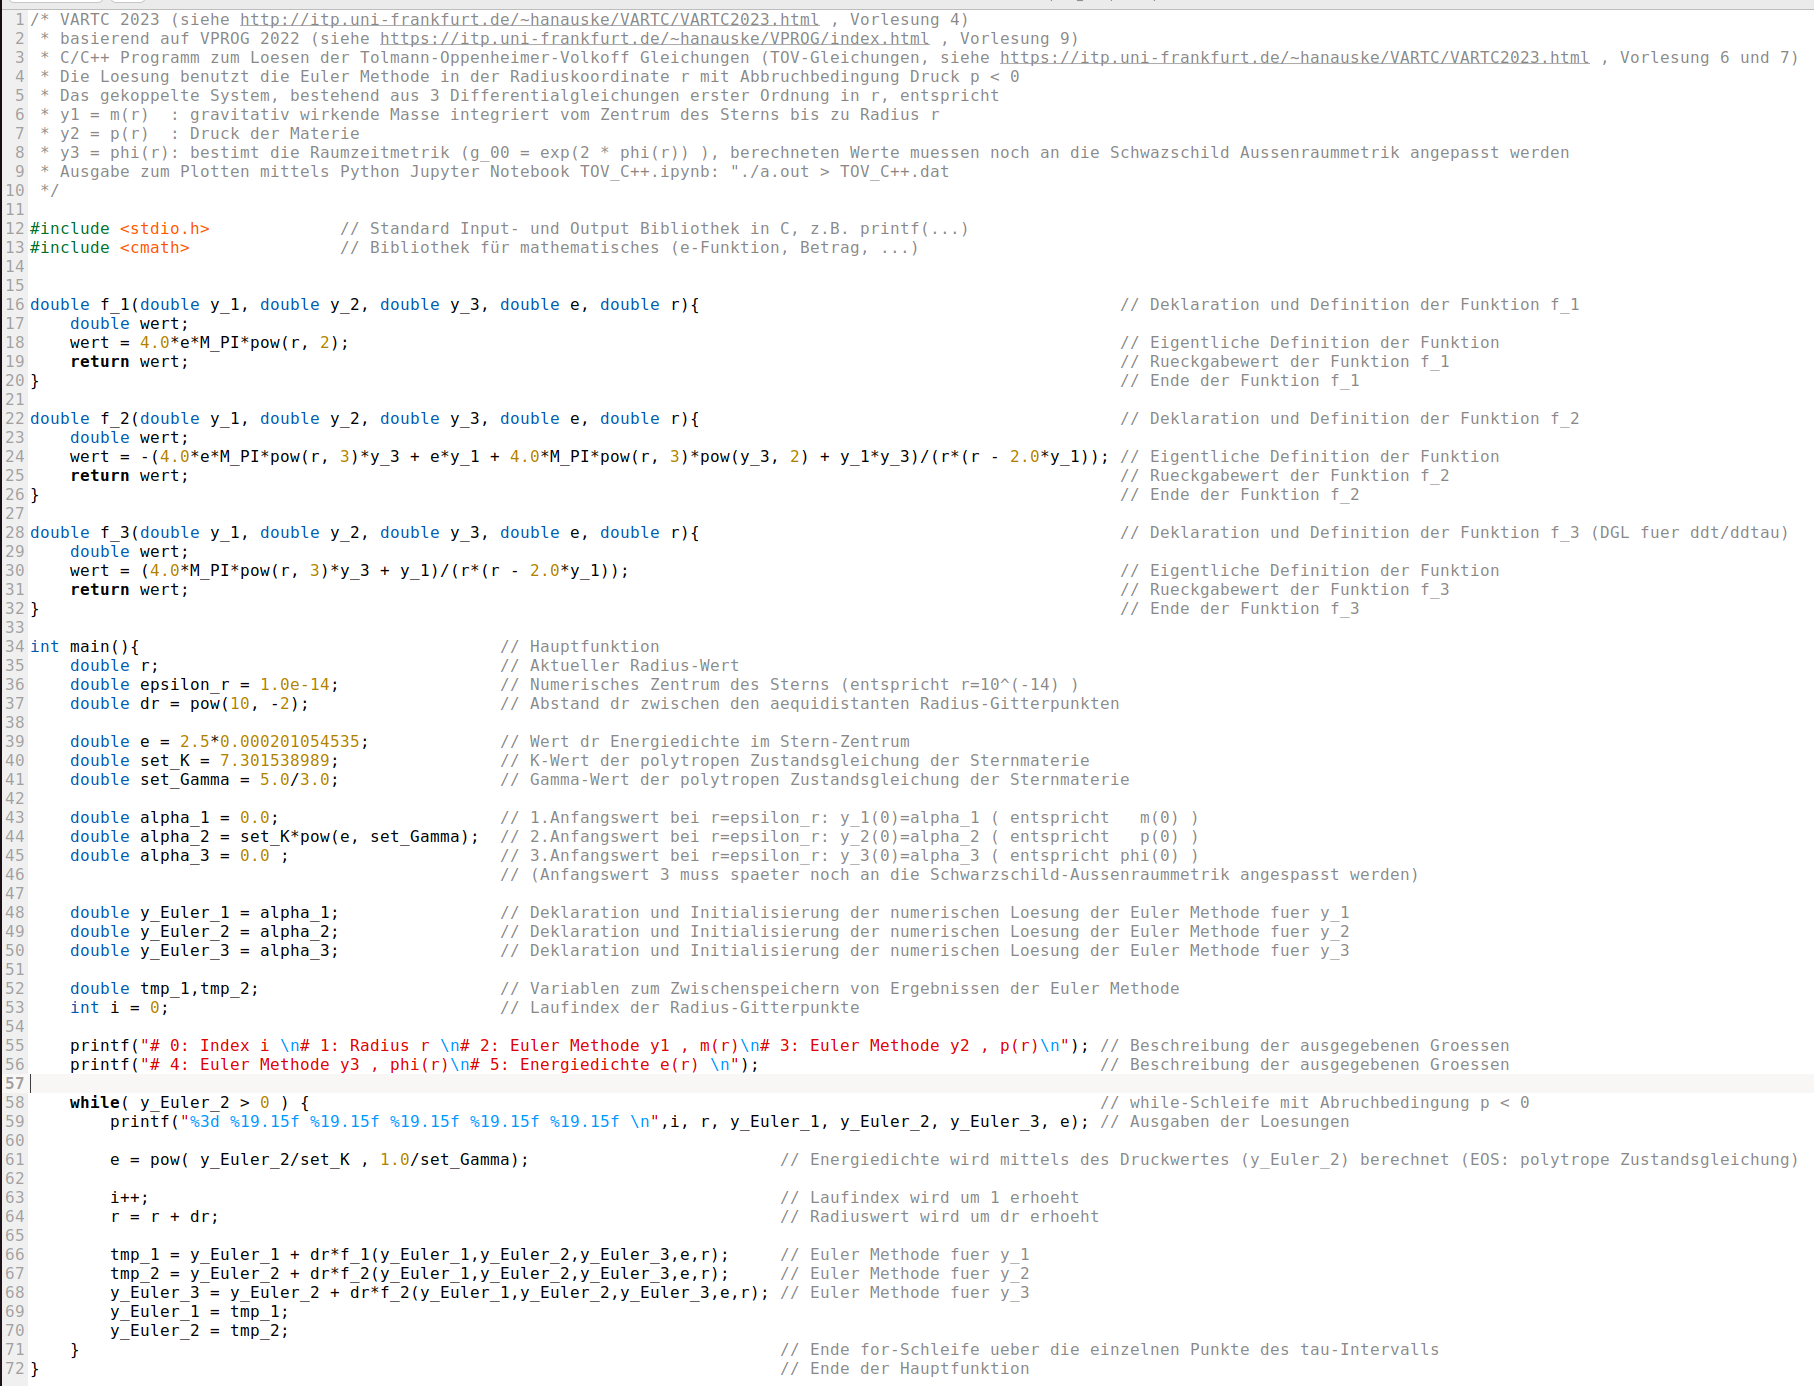

Das Programm berechnet die Lösung der TOV-Gleichunen eines Sterns und schreibt die Daten dann in eine Datei "TOV1_VARTC_2023.dat". Diese Daten-Datei lesen wir im Folgenden ein und dannach visualisieren wir die Daten um die Eigenschaften des berechneten Sterns zu verstehen.

In [31]:
import numpy as np
data = np.genfromtxt("./TOV1_VARTC_2023.dat")

In [32]:
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.gridspec as gridspec
params = {
    'figure.figsize'    : [16,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

Mittels der Daten können wir die berechnete gravitative Gesamtmasse $M=m(r=R)$, den Radius $R$ und die zentrale Energiedichte $e_c = e(r=0)$ des Sterns angeben:

In [33]:
M=data[-1,2]
R=data[-1,1]
e_0=data[0,5]
print(M,R,e_0)

0.984378960936814 14.175999999997583 0.0005026363375


Das folgende Bild veranschaulicht das Druck / Energiedichteprofil im Stern und die Massenfunktion $m(r)$

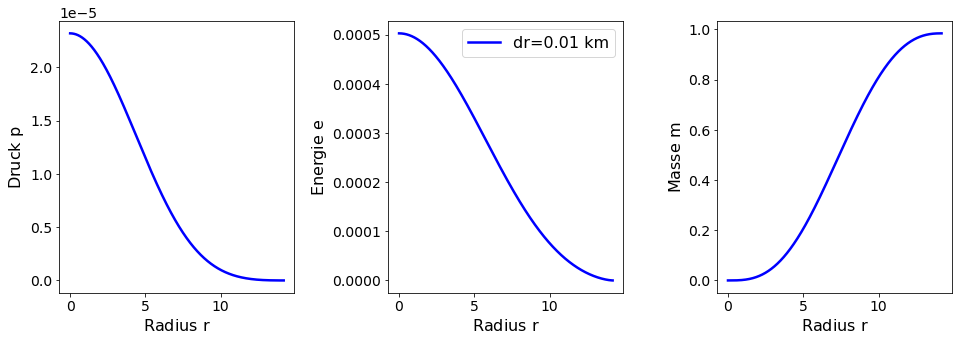

In [34]:
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], wspace=0.40)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.set_ylabel(r"$\rm Druck \,\,p$")
ax1.set_xlabel(r"$\rm Radius \,\,r$")
ax2.set_ylabel(r"$\rm Energie \,\,e $")
ax2.set_xlabel(r"$\rm Radius \,\,r$")
ax3.set_ylabel(r"$\rm Masse \,\,m$")
ax3.set_xlabel(r"$\rm Radius \,\,r$")

ax1.plot(data[:,1], data[:,3], linewidth=2.5, c="blue")
ax2.plot(data[:,1], data[:,5], linewidth=2.5, label="dr=0.01 km", c="blue")
ax3.plot(data[:,1], data[:,2], linewidth=2.5, c="blue")

ax2.legend(loc='best',fontsize=16);

Aufgrund des Birkhoff-Theorems muss die Innenraum-Lösung der Metrik in die äußere Schwarzschildmetrik am Sternrand stetig ineinander übergehen. Da wir nun die Gesamtmasse und den Radius des Sterns kennen, können wir auch die innere $g_{tt}$ und $g_{rr}$ Komponente der Metrik angeben. Der zuvor gewählte Randwert der Metrik-Komponente $\Phi$  ($\Phi(r=0)=0$) war willkürlich gewählt und erst nachdem die Gesamtmasse und der Radius des Sterns durch die numerischen Lösungen bekannt sind, kann man die wirkliche Form der $g_{tt}$-Komponente ($g_{tt}(r)=e^{2\,\Phi(r)}$) durch eine y-Achsenverschiebung erhalten. Am Sternrand ($r=R$) gilt für die $g_{tt}$-Komponente der Metrik:

$$
g_{00}(R) = g_{tt}(R)=e^{2\,\Phi(R)} = \left( 1 - \frac{M}{R} \right) = \left( 1 - \frac{m(R)}{R} \right) \quad ,
$$
wobei $M=m(R)$ die Gesamtmasse des Stern ist.

Die $g_{tt}$-Komponente am Sternrand sollte, wie oben dargestellt, dem Wert der Schwarzschildmetrik entsprechen ($g_{tt}(R)=e^{2\, \Phi(R)}=(1-\frac{2M}{R})$). Dafür ist ein y-Achsen-Shift nötig. Diesen y-Achsen-Shift berechnen wir und addieren den Wert zu den numerisch berechneten $g_{tt}$-Punkten.

Die $g_{rr}=g_{11}$-Komponente hingegen benötigt einen solchen Achsen-Shift nicht, da sie durch die berechnete Funktion $m(r)$ wie folgt definiert wurde
$$
g_{11}(r)=\left( 1 - \frac{2 \, m(r)}{r} \right)^{-1} \quad .
$$

In [35]:
shift_gtt = np.exp(2*(data[-1,4])) - (1-2*M/ptsaussen[0])

In der folgenden Abbildung veranschaulichen wir die Matrik-Komponenten im Innen- und Außenraum des Sterns

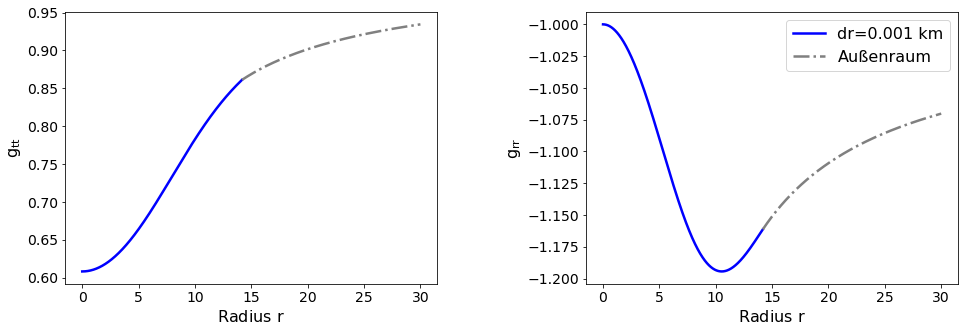

In [36]:
ptsaussen = np.linspace(R, 30, 3000)
shift_phi_L = []
for i in range(0, len(data[:,4])):
    shift_phi_L.append(shift_phi)

fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.40)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_ylabel(r"$\rm g_{tt} $")
ax1.set_xlabel(r"$\rm Radius \,\,r$")
ax2.set_ylabel(r"$\rm g_{rr} $")
ax2.set_xlabel(r"$\rm Radius \,\,r$")

ax1.plot(data[:,1], np.exp(2*data[:,4]) -shift_gtt, linewidth=2.5, c="blue")
ax2.plot(data[1:,1], -(1-2*data[1:,2]/data[1:,1])**(-1), linewidth=2.5, label="dr=0.001 km", c="blue")

ax1.plot(ptsaussen, (1-2*M/ptsaussen), linewidth=2.5, linestyle="dashdot", c="grey", label='Außenraum')
ax2.plot(ptsaussen, -(1-2*M/ptsaussen)**(-1), linewidth=2.5, linestyle="dashdot", c="grey", label='Außenraum')

ax2.legend(loc='best',fontsize=16);

Wir vergleichen nun die Ergebnisse des C++ Programms, welches eine ganze Sequenz von Sternen berechnet (siehe https://itp.uni-frankfurt.de/~hanauske/new/index.html ), und stellen uns die Masse-Radius Beziehung und zentrale Energiedichte-Masse Relation dar.

In [45]:
data_seq = np.genfromtxt("./TOV_C++_seq.dat")

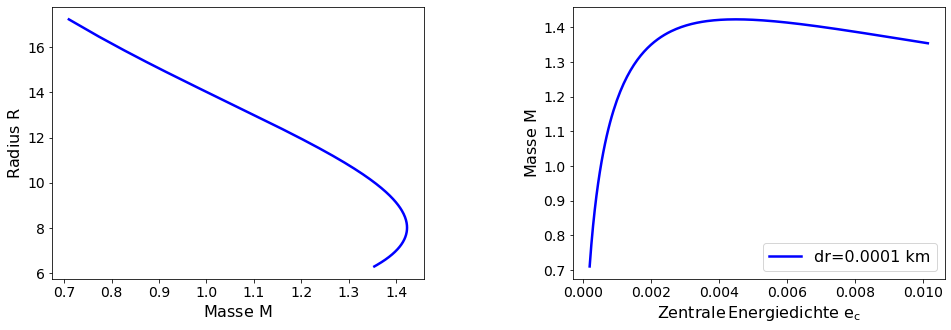

In [46]:
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.40)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_ylabel(r"$\rm Radius \,\,R$")
ax1.set_xlabel(r"$\rm Masse \,\,M$")
ax2.set_ylabel(r"$\rm Masse \,\,M $")
ax2.set_xlabel(r"$\rm Zentrale \, Energiedichte \,\,e_c$")

ax1.plot(data_seq[:,2], data_seq[:,1], linewidth=2.5, c="blue")
ax2.plot(data_seq[:,3], data_seq[:,2] , linewidth=2.5, label="dr=0.0001 km", c="blue")

ax2.legend(loc='best',fontsize=16);